# John Conway's Game of Life
### Ashton T. Sperry
#### ashton.sperry@ronininstitute.org

This notebook provides two versions of John Conway's Game of Life. The first version uses the notebook's strengths to display functions and scratch-work over several cells, with the animation as the result. The second version is a python class with all the necessary functions.

I modify code from Allen Downey's book Think Complexity, 2nd edition: https://github.com/AllenDowney/ThinkComplexity2. Please contact me if you have any corrections, improvements, or questions.

In [1]:
from scipy.signal import correlate2d
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def init_random(rows, cols):
    """Start with random values in the array."""
    return np.random.randint(2, size = (rows, cols), dtype = np.uint8)

The bitwise operation returns 0 or 1 when the whole sequence is false or true.

In [3]:
def step(cell, next_cell):
    
    kernel = np.array([[1, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]])
    
    living_cells = correlate2d(cell, kernel, mode = 'same', boundary = 'wrap')
    
    next_cell = (living_cells == 3) | (living_cells == 2) & cell
    next_cell = next_cell.astype(np.uint8)
    
    return next_cell

In [4]:
rows = 100
cols = rows
steps = 500

cell = init_random(rows, cols)
next_cell = np.zeros_like(cell)

<IPython.core.display.Javascript object>


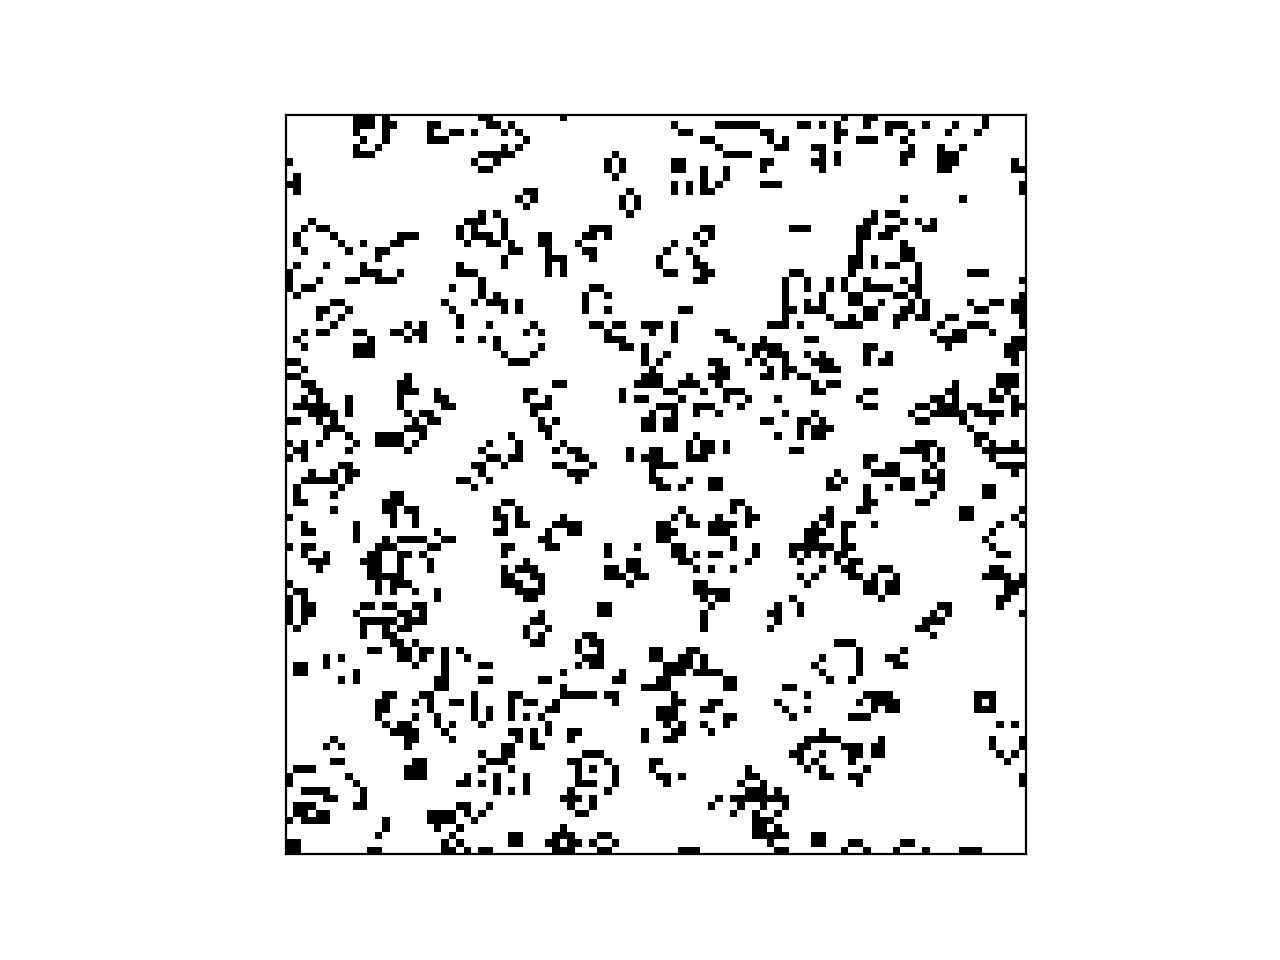

In [5]:
fig = plt.figure()
ims = []
    
for s in range(steps):
    im = plt.imshow(cell, cmap = 'binary', animated = True)
    ims.append([im])

    cell = step(cell, next_cell)

plt.axis('image')
plt.tick_params(axis = 'both', which = 'both', bottom = False, left = False,
                labelbottom = False, labelleft = False)
    
anim = animation.ArtistAnimation(fig, ims, interval = 150, blit = True,
                                repeat_delay = 2000)
    
plt.show()
# anim.save('game_of_life.mp4', writer = 'ffmpeg', fps = 5)

This is the python class that functions as above.

In [6]:
class Life2D:
    """Represents John Conway's 2D cellular automaton."""

    def __init__(self, rows, cols = None):
        """Initializes the automaton.
        
        cell: the numpy array that represents the automaton and contains the data.
        next: the second array on which the first array writes information."""
        self.rows = rows
        self.cols = rows if cols is None else cols
        
        self.cell = np.zeros((self.rows, self.cols), dtype = np.uint8)
        self.next = np.zeros_like(self.cell)

    def init_cells(self, row, col, *strings):
        """Adds cells at the given location.
        
        row: top row index.
        col: left col index.
        strings: list of strings of 0s and 1s."""
        for i, s in enumerate(strings):
            self.cell[row + i, col:col + len(s)] = np.array([int(b) for b in s])

    def init_random(self):
        """Start with random values across the array."""
        self.cell = np.random.randint(2, size = (self.rows, self.cols), dtype = np.uint8)

    def step(self):
        """Executes one time step of the entire array.
        
        kernel: represents a Moore(8) neighborhood."""
        kernel = np.array([[1, 1, 1],
                           [1, 0, 1],
                           [1, 1, 1]])
        
        live = correlate2d(self.cell, kernel, mode = 'same', boundary = 'wrap')
        self.next = live == 3 | live == 2 & self.cell
        self.next = self.next.astype(np.uint8)
        
        return self.next
    
    def anim_2D(self, steps):
        """Executes the animation for the automaton for the number of time steps."""
        fig = plt.figure()
        ims = []
        
        for s in range(steps):
            im = plt.imshow(self.cell, cmap = 'binary', animated = True)
            ims.append([im])
            self.cell = self.step()
        
        plt.axis('image')
        plt.tick_params(axis = 'both', which = 'both', bottom = False, left = False,
                labelbottom = False, labelleft = False)

        anim = animation.ArtistAnimation(fig, ims, interval = 150, blit = True,
                                repeat_delay = 2000)
        
        #anim.save('game_of_life.mp4', writer = 'ffmpeg', fps = 5)
        return anim

Both the number of rows and time steps is needed to initialize the model.

<IPython.core.display.Javascript object>


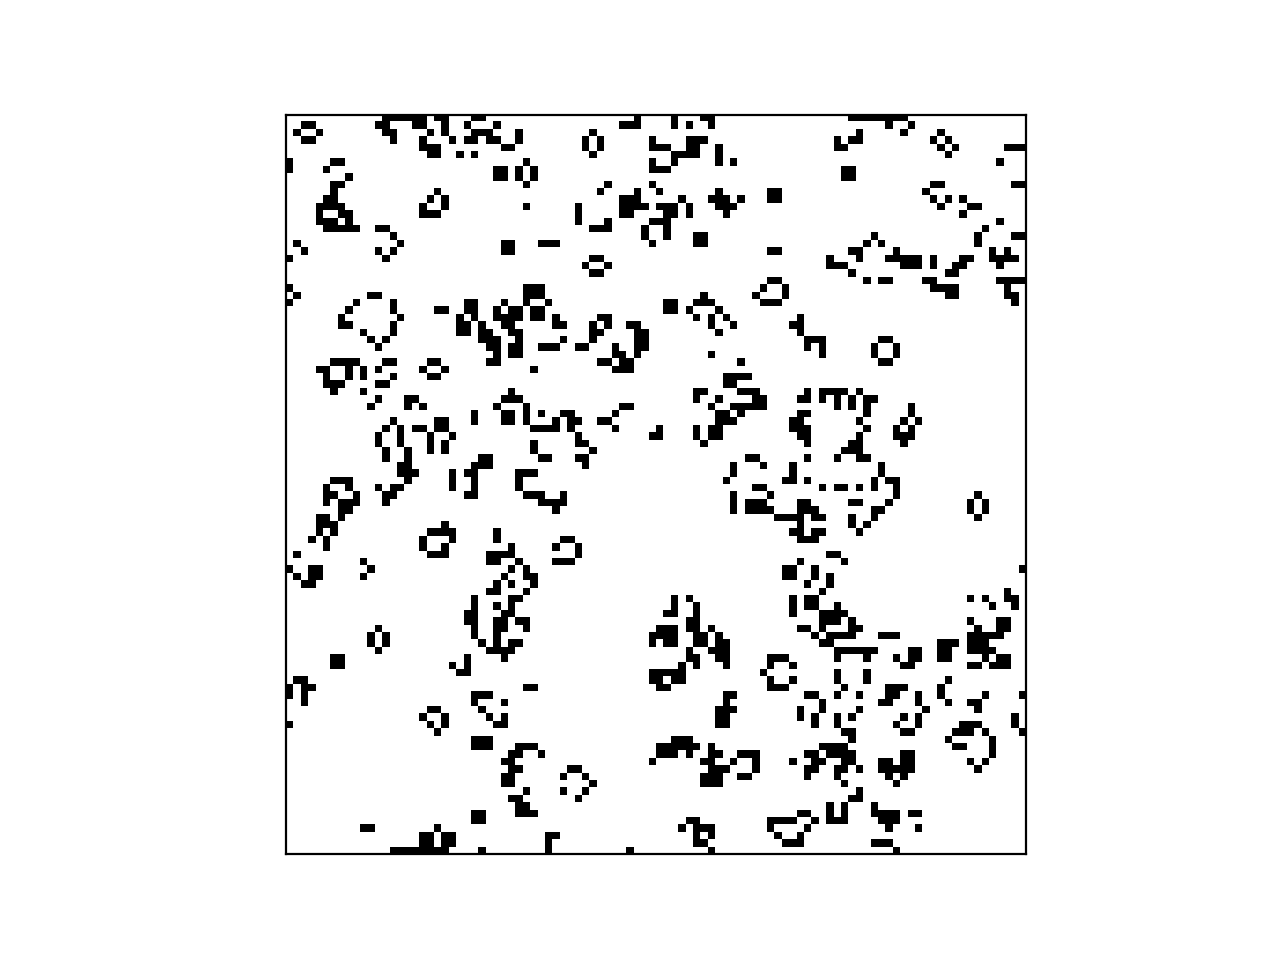

In [7]:
rows = 100
steps = 500

model = Life2D(rows)
model.init_random()
model.anim_2D(steps)